#NN_Digit_Classification

Project 2:
The Real Problem
Recognizing multi-digit numbers in photographs captured at street level is an important
component of modern-day map making. A classic example of a corpus of such street
level photographs are Google’s Street View imagery comprised of hundreds of millions of
geo-located 360-degree panoramic images. The ability to automatically transcribe an
address number from a geo-located patch of pixels and associate the transcribed
number with a known street address helps pinpoint, with a high degree of accuracy, the
location of the building it represents.
More broadly, recognizing numbers in photographs is a problem of interest to the optical
character recognition community. While OCR on constrained domains like document
processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual
appearance of text in the wild on account of a large range of fonts, colors, styles,
orientations, and character arrangements. The recognition problem is further
complicated by environmental factors such as lighting, shadows, specularities, and
occlusions as well as by image acquisition factors such as resolution, motion, and focus
blurs.
In this project, we will use the dataset with images centered around a single digit (many of the
images do contain some distractors at the sides). Although we are taking a sample of
the data which is simpler, it is more complex than MNIST because of the distractors.


The Street View House Numbers (SVHN) Dataset
SVHN is a real-world image dataset for developing machine learning and object
recognition algorithms with the minimal requirement on data formatting but comes from a
significantly harder, unsolved, real-world problem (recognizing digits and numbers in
natural scene images). SVHN is obtained from house numbers in Google Street View
images.




Link to the dataset:
https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

---



In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# %tensorflow_version 1.14

In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
import h5py
import numpy as np
import os
import pandas as pd
from keras.layers import BatchNormalization
#import keras
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [0]:
tf.reset_default_graph()
tf.set_random_seed(5)

In [0]:
tf.keras.backend.clear_session()

## Understand the basic Image Classification pipeline and the data-driven approach(train/predict stages)

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'6. Classification_MNIST_DNN_Keras.ipynb'
 CAPSTONE
 DeepLearningCollabNotebook
'Google Photos'
 Movie
'Paridhi_Colab Notebooks'
'PARIDHI GOLA - Paridhi Gola.jpeg'
 Project2_NN_Digit_Classification_brief_updated.pdf
 SVHN_CNN_Transfer.ipynb
 SVHN_single_grey1.h5
 tweets.csv.gsheet


## Data fetching and understand the train/test splits.

In [0]:
!cp "/content/drive/My Drive/SVHN_single_grey1.h5" "SVHN_single_grey1.h5"

In [0]:
!ls

drive  sample_data  SVHN_single_grey1.h5


In [0]:
 # Open the file as readonly.
 h5f = h5py.File('SVHN_single_grey1.h5','r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

In [0]:
print("Size of various datasets extracted are ")
print("X_train shape is ", X_train.shape,", data set Dtype is ", X_train.dtype, " ,type ", type(X_train))
print("X_test shape is ", X_test.shape,", data set Dtype is ", X_test.dtype, " ,type ", type(X_test))
print("X_val shape is ", X_val.shape,", data set Dtype is ", X_val.dtype, " ,type ", type(X_val))
print("y_train shape is ", y_train.shape,", data set Dtype is ", y_train.dtype, " ,type ", type(y_train))
print("y_test shape is ", y_test.shape,", data set Dtype is ", y_test.dtype, " ,type ", type(y_test))
print("y_val shape is ", y_val.shape,", data set Dtype is ", y_val.dtype, " ,type ", type(y_val))

Size of various datasets extracted are 
X_train shape is  (42000, 32, 32) , data set Dtype is  float32  ,type  <class 'numpy.ndarray'>
X_test shape is  (18000, 32, 32) , data set Dtype is  float32  ,type  <class 'numpy.ndarray'>
X_val shape is  (60000, 32, 32) , data set Dtype is  float32  ,type  <class 'numpy.ndarray'>
y_train shape is  (42000,) , data set Dtype is  uint8  ,type  <class 'numpy.ndarray'>
y_test shape is  (18000,) , data set Dtype is  uint8  ,type  <class 'numpy.ndarray'>
y_val shape is  (60000,) , data set Dtype is  uint8  ,type  <class 'numpy.ndarray'>


In [0]:
print("Training Set", X_train.shape, y_train.shape)
print("Validation Set", X_val.shape, y_val.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (42000, 32, 32) (42000,)
Validation Set (60000, 32, 32) (60000,)
Test Set (18000, 32, 32) (18000,)


In [0]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [0]:
y_train_num = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_num  = tf.keras.utils.to_categorical(y_test,  num_classes=10)
y_val_num   = tf.keras.utils.to_categorical(y_val,   num_classes=10)

In [0]:
X_train_ml  = X_train.reshape(X_train.shape[0], 32*32).astype('float32')
X_test_ml   = X_test.reshape(X_test.shape[0], 32*32).astype('float32')
X_val_ml    = X_val.reshape(X_val.shape[0], 32*32).astype('float32')

In [0]:
X_train_ml /= 255
X_test_ml  /= 255
X_val_ml   /= 255

In [0]:
X_train_ml.shape

(42000, 1024)

## Visualizing the dataset

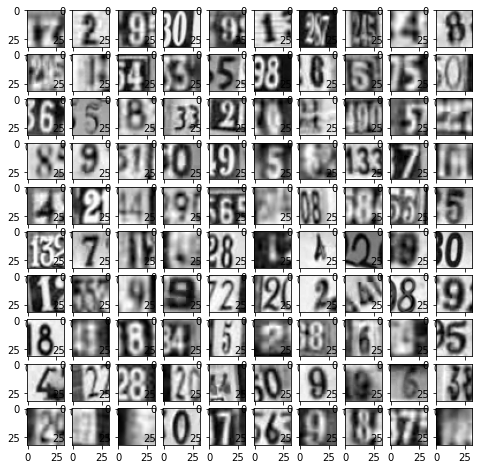

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

## Implement and apply a deep neural network classifier including
## Implement batch normalization for training the neural network 

In [0]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model.add(tf.keras.layers.BatchNormalization())

# Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.5))

# Hidden layers
model.add(tf.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(tf.keras.layers.Dense(30, activation='relu', name='Layer_4'))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.3))

# Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Train the model
model.fit(X_train,y_train_num,          
          validation_data=(X_val,y_val_num),
          epochs=30,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 8s 193us/sample - loss: 2.1867 - acc: 0.1747 - val_loss: 1.6876 - val_acc: 0.3933
Epoch 2/30
42000/42000 [==============================] - 6s 150us/sample - loss: 1.7376 - acc: 0.3815 - val_loss: 1.2822 - val_acc: 0.5954
Epoch 3/30
42000/42000 [==============================] - 6s 148us/sample - loss: 1.4865 - acc: 0.4916 - val_loss: 1.0857 - val_acc: 0.6642
Epoch 4/30
42000/42000 [==============================] - 6s 145us/sample - loss: 1.3506 - acc: 0.5528 - val_loss: 0.9869 - val_acc: 0.6900
Epoch 5/30
42000/42000 [==============================] - 6s 150us/sample - loss: 1.2284 - acc: 0.6010 - val_loss: 0.8806 - val_acc: 0.7334
Epoch 6/30
42000/42000 [==============================] - 6s 149us/sample - loss: 1.1449 - acc: 0.6368 - val_loss: 0.7810 - val_acc: 0.7649
Epoch 7/30
42000/42000 [==============================] - 6s 148us/sample - loss: 1.0832 - acc: 0.6601 - val_l

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
Layer_4 (Dense)              (None, 30)                1

In [0]:
predicted = model.predict_classes(X_test)
predicted.shape

(18000,)

In [0]:
y_test.shape

(18000,)

## Print the classification accuracy metrics 

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1814
           1       0.79      0.89      0.84      1828
           2       0.91      0.82      0.86      1803
           3       0.84      0.79      0.82      1719
           4       0.87      0.88      0.88      1812
           5       0.85      0.83      0.84      1768
           6       0.79      0.85      0.82      1832
           7       0.85      0.90      0.87      1808
           8       0.87      0.76      0.81      1812
           9       0.85      0.81      0.83      1804

    accuracy                           0.84     18000
   macro avg       0.85      0.84      0.84     18000
weighted avg       0.85      0.84      0.84     18000



85% percentage of the results  are relevant while 84% percentage of total relevant results are correctly classified.